<a href="https://colab.research.google.com/github/jansle2005/Data-Science-Repository/blob/master/Twitter_Scraping_OK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Scrapping & Analysis - 22/02/2022 - 07:00h - Quarta-feira de Carnaval

## Instalações de Bibliotecas

In [1]:
!pip install snscrape
!pip install pandas
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importa Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import snscrape.modules.twitter as sntwitter
import datetime
from tqdm.notebook import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

## Input dos Filtros

In [4]:
text = input('TEXT da consulta (ou deixe em branco pressionando enter)')
username = input('Digite o(s) NOME(s) de usuário(s) específico(s) de uma conta do Twitter sem @ (ou deixe em branco - enter): ')
data1 = input('DATA1 início aaaa-mm-dd (ou deixe em branco com enter): ')
data2 = input('DATA2 final  aaaa-mm-dd (ou deixe em branco com enter): ')
# Essa alteração a seguir ses faz necessária devido ao método de contagem de dias do snscraper
def day_after(data2):
  data = datetime.datetime.strptime(data2, '%Y-%m-%d')
  dia_seguinte = data + datetime.timedelta(days=1)
  data_formatada = dia_seguinte.strftime('%Y-%m-%d')
  return data_formatada
data2=day_after(data2)

count = int(input('Digite o número máximo de tweets ou digite -1 para recuperar todos os tweets possíveis: '))
retweet ='s' #input('Excluir Retweets? (s/n): ')
replies ='s' #input('Excluir Replies? (s/n): ')

TEXT da consulta (ou deixe em branco pressionando enter)Putin afirma
Digite o(s) NOME(s) de usuário(s) específico(s) de uma conta do Twitter sem @ (ou deixe em branco - enter): 
DATA1 início aaaa-mm-dd (ou deixe em branco com enter): 2023-02-01
DATA2 final  aaaa-mm-dd (ou deixe em branco com enter): 2023-02-19
Digite o número máximo de tweets ou digite -1 para recuperar todos os tweets possíveis: 500


In [5]:
def search(text,username,data1,data2,retweet,replies):
    global filename

    q = text+ ' lang:pt'
   
    if username!='': q += f" from:{username}"   
    if data1=='':   data1 = datetime.datetime.strftime(datetime.datetime.strptime(data2, '%Y-%m-%d') - datetime.timedelta(days=7), '%Y-%m-%d')
    
    q += f" since:{data1}" 
    
    if data2=='': data2 = datetime.datetime.strftime(datetime.date.today(), '%Y-%m-%d')
    
    q += f" until:{data2}"
   
    if retweet == 's':   q += f" exclude:retweets"
    if replies == 's':   q += f" exclude:replies"
    if username!='' and text!='':   filename = f"{data1}_{data2}_{username}_{text}.csv"
    elif username!="":              filename = f"{data1}_{data2}_{username}.csv"
    else:                           filename = f"{data1}_{data2}_{text}.csv"
    
    print(filename)
    print('q FINAL = ',q)
    return q

In [6]:
q=search(text,username,data1,data2,retweet,replies)

2023-02-01_2023-02-20_Putin afirma.csv
q FINAL =  Putin afirma lang:pt since:2023-02-01 until:2023-02-20 exclude:retweets exclude:replies


## Inicia o Scrapping

In [8]:
# ___________________________________________

# Criação da lista  vazia que se fará append de dados de tweet  e do dataframe
tweets_list1 = []
tweets_df1=[]


# Usar TwitterSearchScraper para raspar dados do Tweeter para apensar a uma lista
if count == -1:
    for i,tweet in enumerate(tqdm_notebook(sntwitter.TwitterSearchScraper(q).get_items())):
        tweets_list1.append([tweet.date, 
                             tweet.id, 
                             tweet.rawContent, 
                             tweet.user.username,
                             tweet.user.location,
                             tweet.place,
                             tweet.hashtags,
                             tweet.likeCount])

else:
    with tqdm_notebook(total=count) as pbar:
        for i,tweet in enumerate(sntwitter.TwitterSearchScraper(q).get_items()):
            if i>=count: #number of tweets you want to scrape
                break
            tweets_list1.append([tweet.date, 
                                 tweet.id, 
                                 tweet.rawContent, 
                                 tweet.user.username,
                                 tweet.user.location,
                                 tweet.place,
                                 tweet.hashtags,
                                 tweet.likeCount])
            
            pbar.update(1)

# Criar dataframe partindo da lista criada acima 
tweets_df1 = pd.DataFrame(tweets_list1, columns=['DateTime', 'TweetId', 'Text', 'Username','Local','Place',
                                'Hashtags','LikeCount'])


#___________________________________________

  0%|          | 0/500 [00:00<?, ?it/s]

In [9]:
tweets_df1.sort_values(by='DateTime')

,DateTime,TweetId,Text,Username,Local,Place,Hashtags,LikeCount
49,2023-02-01 17:46:09+00:00,1620840943053115393,Recordando: Inteligência dos EUA afirma que P...,areamilitarof,London,None,None,34
48,2023-02-02 00:17:14+00:00,1620939365022310400,“Putin afirma que não tem dúvidas de que a sob...,NewsAndRetweets,The Earth,None,None,0
47,2023-02-02 16:54:23+00:00,1621190305901862912,Veremos o ataque mais ousado do século? Import...,hoje_no,Brazil,None,None,721
46,2023-02-02 19:53:50+00:00,1621235462902894594,"‘Depois do nazismo, Rússia é ameaçada novament...",SigaGazetaBR,Brasil,None,None,304
45,2023-02-02 19:59:41+00:00,1621236937989279747,"'Depois do nazismo, Rússia é ameaçada novament...",pedronimeth,,None,None,0
44,2023-02-02 20:21:26+00:00,1621242411014823940,"‘Depois do nazismo, Rússia é ameaçada novament...",jos_pontes1,Goiânia,None,None,0
43,2023-02-02 22:33:06+00:00,1621275546364567555,TÁ NA REDE \n\n(Agências Internacionais) - ‘De...,N_Carvalheira,"Rio de Janeiro, Brasil",None,None,4
42,2023-02-03 01:49:51+00:00,1621325058948857856,Gran Discurso de Vladimir Putin y Advierte Con...,OFernandesb,Parede-PORTUGAL,None,None,0
41,2023-02-03 16:24:38+00:00,1621545203826843652,PUTIN AFIRMA QUE OCIDENTE ESTÁ ESCALANDO A GUE...,Eduardo06775440,,None,"[Guerra, Ucrania, Russia, Donbass, GuerraNaUcr...",2
40,2023-02-04 13:55:46+00:00,1621870127972028416,PUTIN AFIRMA QUE OCIDENTE ESTÁ ESCALANDO A GUE...,Eduardo06775440,,None,"[Guerra, Ucrania, Russia, Donbass, GuerraNaUcr...",2


In [10]:
tweets_df1['Place'].fillna(' ', inplace=True)
tweets_df1['Local'].fillna(' ', inplace=True)

print(tweets_df1.dtypes)


DateTime     datetime64[ns, UTC]
TweetId                    int64
Text                      object
Username                  object
Local                     object
Place                     object
Hashtags                  object
LikeCount                  int64
dtype: object


In [11]:
import pandas as pd
# carrega o arquivo com as cidades e UFs
df_cidades = pd.read_csv('https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/municipios.csv')

In [12]:
codigo_uf = {
    11: 'RO', 12: 'AC', 13: 'AM', 14: 'RR', 15: 'PA', 16: 'AP', 17: 'TO',
    21: 'MA', 22: 'PI', 23: 'CE', 24: 'RN', 25: 'PB', 26: 'PE', 27: 'AL', 28: 'SE', 29: 'BA',
    31: 'MG', 32: 'ES', 33: 'RJ', 35: 'SP',
    41: 'PR', 42: 'SC', 43: 'RS',
    50: 'MS', 51: 'MT', 52: 'GO', 53: 'DF'
}

df_cidades['UF'] = df_cidades['codigo_uf'].map(codigo_uf)
df_cidades

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario,UF
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo,GO
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo,MG
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo,GO
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo,MG
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo,PA
...,...,...,...,...,...,...,...,...,...,...
5565,2933604,Xique-Xique,-10.82300,-42.7245,0,29,3971,74,America/Sao_Paulo,BA
5566,2517407,Zabelê,-8.07901,-37.1057,0,25,542,83,America/Sao_Paulo,PB
5567,3557154,Zacarias,-21.05060,-50.0552,0,35,2973,18,America/Sao_Paulo,SP
5568,2114007,Zé Doca,-3.27014,-45.6553,0,21,1287,98,America/Sao_Paulo,MA


In [13]:
# cria um dicionário com a relação UF -> cidade
uf_cidade_dict = {}
for uf in df_cidades['UF'].unique():
    uf_cidade_dict[uf] = set(df_cidades[df_cidades['UF'] == uf]['nome'].str.lower())

# função para obter a UF a partir de uma string
def get_uf_string(string):
    for uf, cidades in uf_cidade_dict.items():
        if any(cidade in string.lower() for cidade in cidades):
            return uf
    return None

# aplica a função em cada linha do dataframe de tweets
tweets_df1['UF1'] = tweets_df1.apply(lambda row: get_uf_string(row['Local']), axis=1)

In [14]:
display(tweets_df1)

,DateTime,TweetId,Text,Username,Local,Place,Hashtags,LikeCount,UF1
0,2023-02-19 22:20:01+00:00,1627432845646888961,O presidente Zelensky afirma que Putin tem com...,RCostadias,"Pelotas, Brasil",,None,130,RS
1,2023-02-19 14:00:01+00:00,1627307018959613954,Washington denuncia formalmente a Rússia em um...,correio,"Brasília, Brasil",,None,3,DF
2,2023-02-18 16:06:34+00:00,1626976476896559105,“É óbvio que a Ucrânia não será sua última par...,hoje_no,Brazil,,None,1106,None
3,2023-02-18 08:22:04+00:00,1626859582340403201,"E em entrevista para a TV russa, um soldado af...",BananiaBom,,,None,0,None
4,2023-02-18 01:09:25+00:00,1626750699907194880,Lukashenko afirma a Putin que Bielorrússia pod...,observadorpt,Portugal,,None,0,None
5,2023-02-18 00:46:24+00:00,1626744910790402050,Lukashenko afirma a Putin que Bielorrússia pod...,Renascenca,,,None,0,None
6,2023-02-18 00:07:40+00:00,1626735162812960769,Lukashenko afirma a Putin que Bielorrússia pod...,dnoticiaspt,,,None,1,None
7,2023-02-17 23:15:13+00:00,1626721961538908160,Lukashenko afirma a Putin que Bielorrússia pod...,dntwit,Lisboa,,None,0,None
8,2023-02-17 23:00:23+00:00,1626718227723173888,Lukashenko afirma a Putin que Bielorrússia pod...,noticiaaominuto,Portugal,,[mundoaominuto],0,None
9,2023-02-17 22:56:58+00:00,1626717367639105536,Lukashenko afirma a Putin que Bielorrússia pod...,Lusa_noticias,Portugal,,None,4,None


## Fazer Análise de Sentimento

In [15]:
focus_word=text

### TextBlob

In [16]:
from textblob import TextBlob

# função para calcular o número de palavras em cada tweet
def contar_palavras(tweet):
    return len(tweet.split())

# função para calcular a polaridade do tweet usando TextBlob
def calcular_polaridade(tweet):
    tb = TextBlob(tweet)
    return tb.sentiment.polarity

# função para calcular o sentimento do tweet usando TextBlob
def calcular_sentimento(tweet):
    tb = TextBlob(tweet)
    return tb.sentiment.subjectivity

# adicionar coluna com o número de palavras de cada tweet
tweets_df1['num_palavras_Blob'] = tweets_df1['Text'].apply(contar_palavras)

# adicionar coluna com a polaridade de cada tweet
tweets_df1['polari_Blob'] = tweets_df1['Text'].apply(calcular_polaridade)

# adicionar coluna com o sentimento de cada tweet
tweets_df1['senti_Blob'] = tweets_df1['Text'].apply(calcular_sentimento)

In [17]:
display(tweets_df1)

,DateTime,TweetId,Text,Username,Local,Place,Hashtags,LikeCount,UF1,num_palavras_Blob,polari_Blob,senti_Blob
0,2023-02-19 22:20:01+00:00,1627432845646888961,O presidente Zelensky afirma que Putin tem com...,RCostadias,"Pelotas, Brasil",,None,130,RS,23,0.0,0.00
1,2023-02-19 14:00:01+00:00,1627307018959613954,Washington denuncia formalmente a Rússia em um...,correio,"Brasília, Brasil",,None,3,DF,31,0.0,0.00
2,2023-02-18 16:06:34+00:00,1626976476896559105,“É óbvio que a Ucrânia não será sua última par...,hoje_no,Brazil,,None,1106,None,24,0.0,0.00
3,2023-02-18 08:22:04+00:00,1626859582340403201,"E em entrevista para a TV russa, um soldado af...",BananiaBom,,,None,0,None,43,0.0,0.00
4,2023-02-18 01:09:25+00:00,1626750699907194880,Lukashenko afirma a Putin que Bielorrússia pod...,observadorpt,Portugal,,None,0,None,12,0.0,0.00
5,2023-02-18 00:46:24+00:00,1626744910790402050,Lukashenko afirma a Putin que Bielorrússia pod...,Renascenca,,,None,0,None,12,0.0,0.00
6,2023-02-18 00:07:40+00:00,1626735162812960769,Lukashenko afirma a Putin que Bielorrússia pod...,dnoticiaspt,,,None,1,None,12,0.0,0.00
7,2023-02-17 23:15:13+00:00,1626721961538908160,Lukashenko afirma a Putin que Bielorrússia pod...,dntwit,Lisboa,,None,0,None,12,0.0,0.00
8,2023-02-17 23:00:23+00:00,1626718227723173888,Lukashenko afirma a Putin que Bielorrússia pod...,noticiaaominuto,Portugal,,[mundoaominuto],0,None,13,0.0,0.00
9,2023-02-17 22:56:58+00:00,1626717367639105536,Lukashenko afirma a Putin que Bielorrússia pod...,Lusa_noticias,Portugal,,None,4,None,14,0.0,0.00


### Vander com Focus Word

In [18]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instancia o SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Itera sobre cada texto na coluna "Text"
for index, row in tweets_df1.iterrows():
    text1 = row["Text"]
    
    # Aplica a análise de sentimento do VADER
    sentiment_scores = analyzer.polarity_scores(text1)
    
    # Adiciona o resultado à nova coluna "Sent VANDER"
    tweets_df1.loc[index, "Sent VANDER"] = sentiment_scores["compound"]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
text

'Putin afirma'

In [20]:
tweets_df1

,DateTime,TweetId,Text,Username,Local,Place,Hashtags,LikeCount,UF1,num_palavras_Blob,polari_Blob,senti_Blob,Sent VANDER
0,2023-02-19 22:20:01+00:00,1627432845646888961,O presidente Zelensky afirma que Putin tem com...,RCostadias,"Pelotas, Brasil",,None,130,RS,23,0.0,0.00,0.0000
1,2023-02-19 14:00:01+00:00,1627307018959613954,Washington denuncia formalmente a Rússia em um...,correio,"Brasília, Brasil",,None,3,DF,31,0.0,0.00,0.0000
2,2023-02-18 16:06:34+00:00,1626976476896559105,“É óbvio que a Ucrânia não será sua última par...,hoje_no,Brazil,,None,1106,None,24,0.0,0.00,0.0000
3,2023-02-18 08:22:04+00:00,1626859582340403201,"E em entrevista para a TV russa, um soldado af...",BananiaBom,,,None,0,None,43,0.0,0.00,0.0000
4,2023-02-18 01:09:25+00:00,1626750699907194880,Lukashenko afirma a Putin que Bielorrússia pod...,observadorpt,Portugal,,None,0,None,12,0.0,0.00,0.0000
5,2023-02-18 00:46:24+00:00,1626744910790402050,Lukashenko afirma a Putin que Bielorrússia pod...,Renascenca,,,None,0,None,12,0.0,0.00,0.0000
6,2023-02-18 00:07:40+00:00,1626735162812960769,Lukashenko afirma a Putin que Bielorrússia pod...,dnoticiaspt,,,None,1,None,12,0.0,0.00,0.0000
7,2023-02-17 23:15:13+00:00,1626721961538908160,Lukashenko afirma a Putin que Bielorrússia pod...,dntwit,Lisboa,,None,0,None,12,0.0,0.00,0.0000
8,2023-02-17 23:00:23+00:00,1626718227723173888,Lukashenko afirma a Putin que Bielorrússia pod...,noticiaaominuto,Portugal,,[mundoaominuto],0,None,13,0.0,0.00,0.0000
9,2023-02-17 22:56:58+00:00,1626717367639105536,Lukashenko afirma a Putin que Bielorrússia pod...,Lusa_noticias,Portugal,,None,4,None,14,0.0,0.00,0.0000


In [21]:
tweets_df1

,DateTime,TweetId,Text,Username,Local,Place,Hashtags,LikeCount,UF1,num_palavras_Blob,polari_Blob,senti_Blob,Sent VANDER
0,2023-02-19 22:20:01+00:00,1627432845646888961,O presidente Zelensky afirma que Putin tem com...,RCostadias,"Pelotas, Brasil",,None,130,RS,23,0.0,0.00,0.0000
1,2023-02-19 14:00:01+00:00,1627307018959613954,Washington denuncia formalmente a Rússia em um...,correio,"Brasília, Brasil",,None,3,DF,31,0.0,0.00,0.0000
2,2023-02-18 16:06:34+00:00,1626976476896559105,“É óbvio que a Ucrânia não será sua última par...,hoje_no,Brazil,,None,1106,None,24,0.0,0.00,0.0000
3,2023-02-18 08:22:04+00:00,1626859582340403201,"E em entrevista para a TV russa, um soldado af...",BananiaBom,,,None,0,None,43,0.0,0.00,0.0000
4,2023-02-18 01:09:25+00:00,1626750699907194880,Lukashenko afirma a Putin que Bielorrússia pod...,observadorpt,Portugal,,None,0,None,12,0.0,0.00,0.0000
5,2023-02-18 00:46:24+00:00,1626744910790402050,Lukashenko afirma a Putin que Bielorrússia pod...,Renascenca,,,None,0,None,12,0.0,0.00,0.0000
6,2023-02-18 00:07:40+00:00,1626735162812960769,Lukashenko afirma a Putin que Bielorrússia pod...,dnoticiaspt,,,None,1,None,12,0.0,0.00,0.0000
7,2023-02-17 23:15:13+00:00,1626721961538908160,Lukashenko afirma a Putin que Bielorrússia pod...,dntwit,Lisboa,,None,0,None,12,0.0,0.00,0.0000
8,2023-02-17 23:00:23+00:00,1626718227723173888,Lukashenko afirma a Putin que Bielorrússia pod...,noticiaaominuto,Portugal,,[mundoaominuto],0,None,13,0.0,0.00,0.0000
9,2023-02-17 22:56:58+00:00,1626717367639105536,Lukashenko afirma a Putin que Bielorrússia pod...,Lusa_noticias,Portugal,,None,4,None,14,0.0,0.00,0.0000


# Gráfico de Barras - Tweets por dia

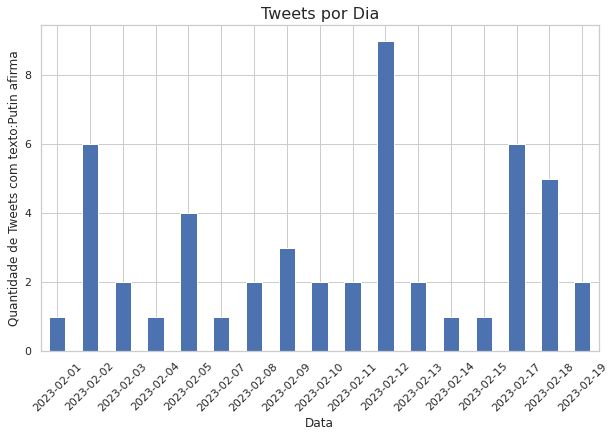

In [22]:
import matplotlib.pyplot as plt
tweets_df1['Date'] = pd.to_datetime(tweets_df1['DateTime']).dt.date
tweets_por_dia = tweets_df1['Date'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10,6))
tweets_por_dia.plot(kind='bar', ax=ax)
ax.set_xticklabels(tweets_por_dia.index, rotation=45)
ax.set_title('Tweets por Dia', fontsize=16)
ax.set_xlabel('Data',fontsize=12)
ax.set_ylabel('Quantidade de Tweets com texto:'+ text,fontsize=12)
nome_arquivo = "BarGraph_Tweets_" + text + '_since_' + data1 + '_til_' + data2+".png"
plt.savefig(nome_arquivo,dpi=300, bbox_inches='tight')
plt.show()

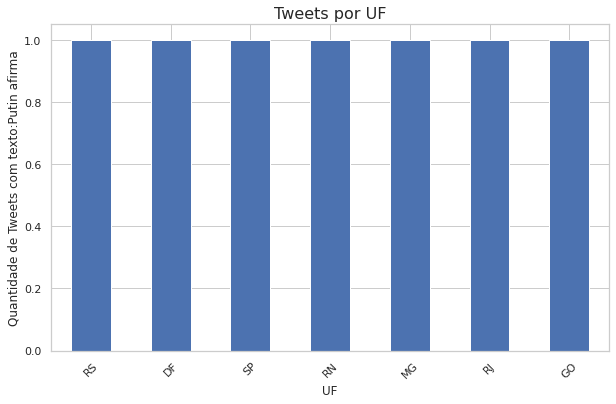

In [23]:
tweets_por_estado = tweets_df1['UF1'].value_counts()
fig, ax = plt.subplots(figsize=(10,6))
tweets_por_estado.plot(kind='bar', ax=ax)
ax.set_xticklabels(tweets_por_estado.index, rotation=45)
ax.set_title('Tweets por UF', fontsize=16)
ax.set_xlabel('UF',fontsize=12)
ax.set_ylabel('Quantidade de Tweets com texto:'+ text,fontsize=12)
nome_arquivo = "BarGraph_Tweets_UFs" + text + '_since_' + data1 + '_til_' + data2+".png"
plt.savefig(nome_arquivo,dpi=300, bbox_inches='tight')
plt.show()


# Nuvem de palavras

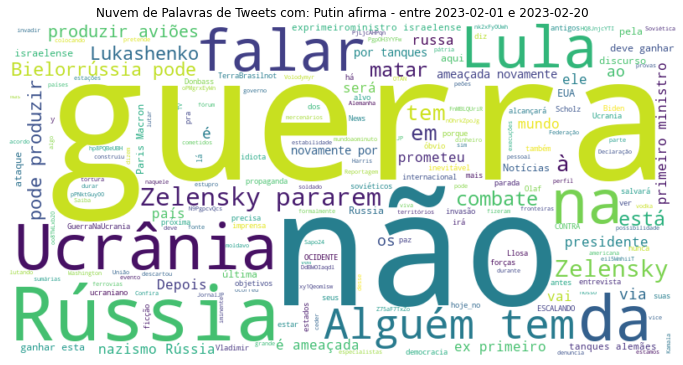

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

texto = ' '.join(tweets_df1['Text'])
lista_sabida = text.split()
cai_fora = ['como','com','t','que','https', 'co', 'RT', 'para', 'sua', 'de', 'a', 'o', 'seu', 'teu', 'tua', 'minha', 'meu', 'do', 'e', 'um', 'uma', 'pelo'] + lista_sabida
wc = WordCloud(width=800, height=400, background_color='white', max_words=200, stopwords=cai_fora)
wc.generate_from_text(texto)

fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(wc, interpolation='bilinear')
ax.axis('off')

title = "Nuvem de Palavras de Tweets com: " + text + ' - entre ' + data1 + ' e ' + data2
ax.set_title(title, fontsize=12, color='black')

nome_arquivo = "WordCloud_Tweets_com_" + text + '_since_' + data1 + '_til_' + data2+".png"
plt.savefig(nome_arquivo,dpi=300, bbox_inches='tight')
plt.show()

In [25]:
text

'Putin afirma'